<a href="https://colab.research.google.com/github/Tushar-2935/Titanic-Survival-Prediction/blob/main/Titanic_Survival.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
train_data = pd.read_csv('/content/train (1).csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd

sibsp	- of siblings / spouses aboard the Titanic

parch	- of parents / children aboard the Titanic

embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton


In [ ]:
train_data.shape

(891, 12)

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Checking for null values in the data

In [ ]:
train_data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


There are null values in the data
We will drop the embarked and cabin values and for the age column we replace fill them with mean values

In [ ]:
train_data.drop('Cabin',axis=1,inplace=True)

In [ ]:
train_data.drop('Embarked',axis=1,inplace=True)

In [ ]:
train_data.fillna(train_data['Age'].mean(),inplace=True)

In [ ]:
train_data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
train_data['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6])

In [ ]:
train_data['Parch'].value_counts()

,count
Parch,
0,678
1,118
2,80
5,5
3,5
4,4
6,1


# **Data Visualization**

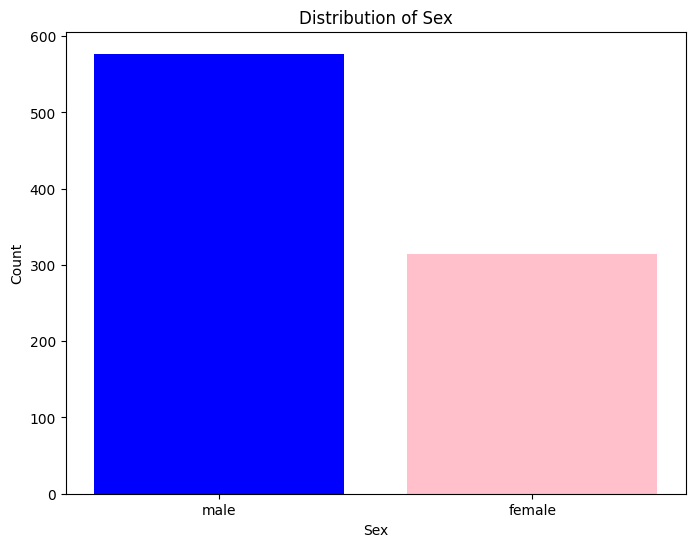

In [ ]:
sex_counts = train_data['Sex'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(sex_counts.index, sex_counts.values,color = ['blue','pink'])
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Distribution of Sex')
plt.show()

There are more males than females

In [ ]:
train_data['Sex'].value_counts()

,count
Sex,
male,577
female,314


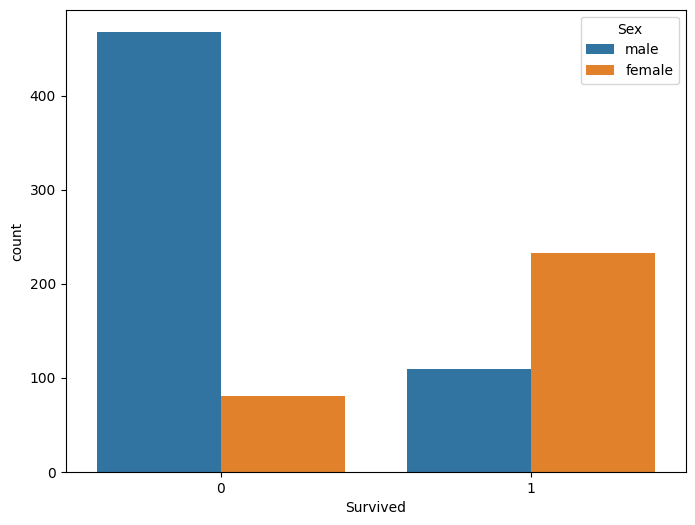

In [ ]:
plt.figure(figsize = (8,6))
sns.countplot(x='Survived',hue='Sex',data=train_data)
plt.show()

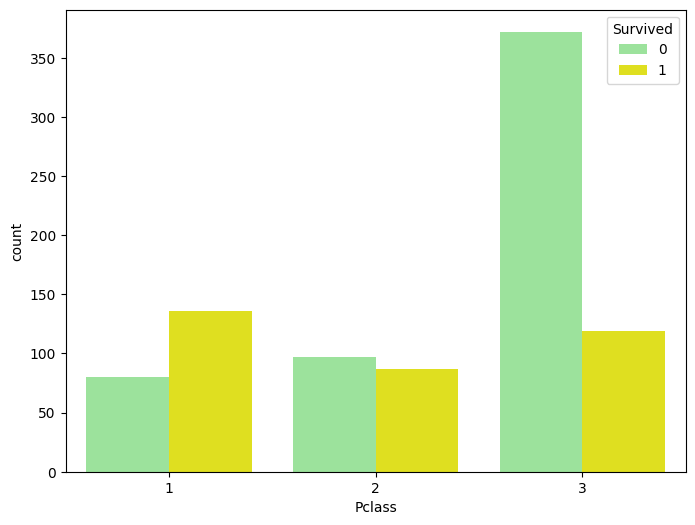

In [ ]:
plt.figure(figsize = (8,6))
sns.countplot(x = 'Pclass',hue = 'Survived',data = train_data,palette = ['lightgreen','yellow'])
plt.show()

The highest number of people survived from first class then third class followed by second class

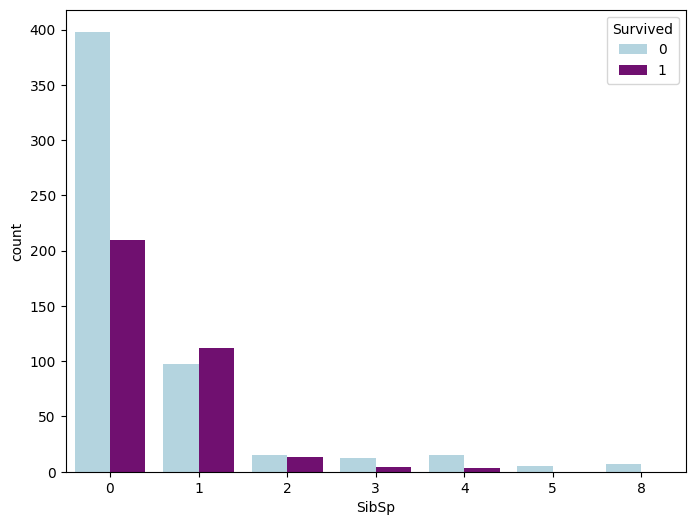

In [ ]:
plt.figure(figsize = (8,6))
sns.countplot(x = 'SibSp',hue = 'Survived',data = train_data,palette = ['lightblue','purple'])
plt.show()

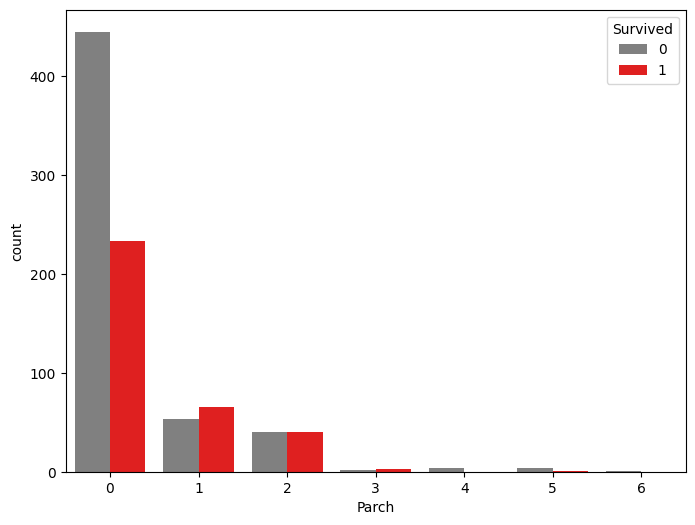

In [ ]:
plt.figure(figsize = (8,6))
sns.countplot(x = 'Parch',hue = 'Survived',data = train_data,palette = ['grey','red'])
plt.show()

It can be seen from the above two graph that people with no family member onboard had the highest chance of survival

In [ ]:
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

% of women who survived: 0.7420382165605095


In [ ]:
men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

% of men who survived: 0.18890814558058924


# **Model Building**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = pd.get_dummies(train_data[["Pclass", "Sex", "SibSp", "Parch"]])
y = train_data["Survived"]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and validate
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
model.fit(X_train, y_train)

# Accuracy
y_pred = model.predict(X_val)
accuracy_score(y_val, y_pred)

0.7932960893854749

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_val, y_pred))

[[90 15]
 [22 52]]


Accuracy is 79% or 0.79

Confusion Matrix interpretation:

True Negative = 90 (Actual value was 0 and the model correctly predicted 0)

False Negative = 22(Model predicted 0 but the person survived)

True Positive = 52(Model correctly predicted that the person survived)

False Positive = 12(Model predicted 1 but the actual value was zero)

In [ ]:
from sklearn.metrics import precision_score,recall_score
print(precision_score(y_val, y_pred))
print(recall_score(y_val, y_pred))

0.7761194029850746
0.7027027027027027


Precision = TP / (TP + FP)

Recall = TP / (TP + FN)

Accuracy = (TP + TN) / Total



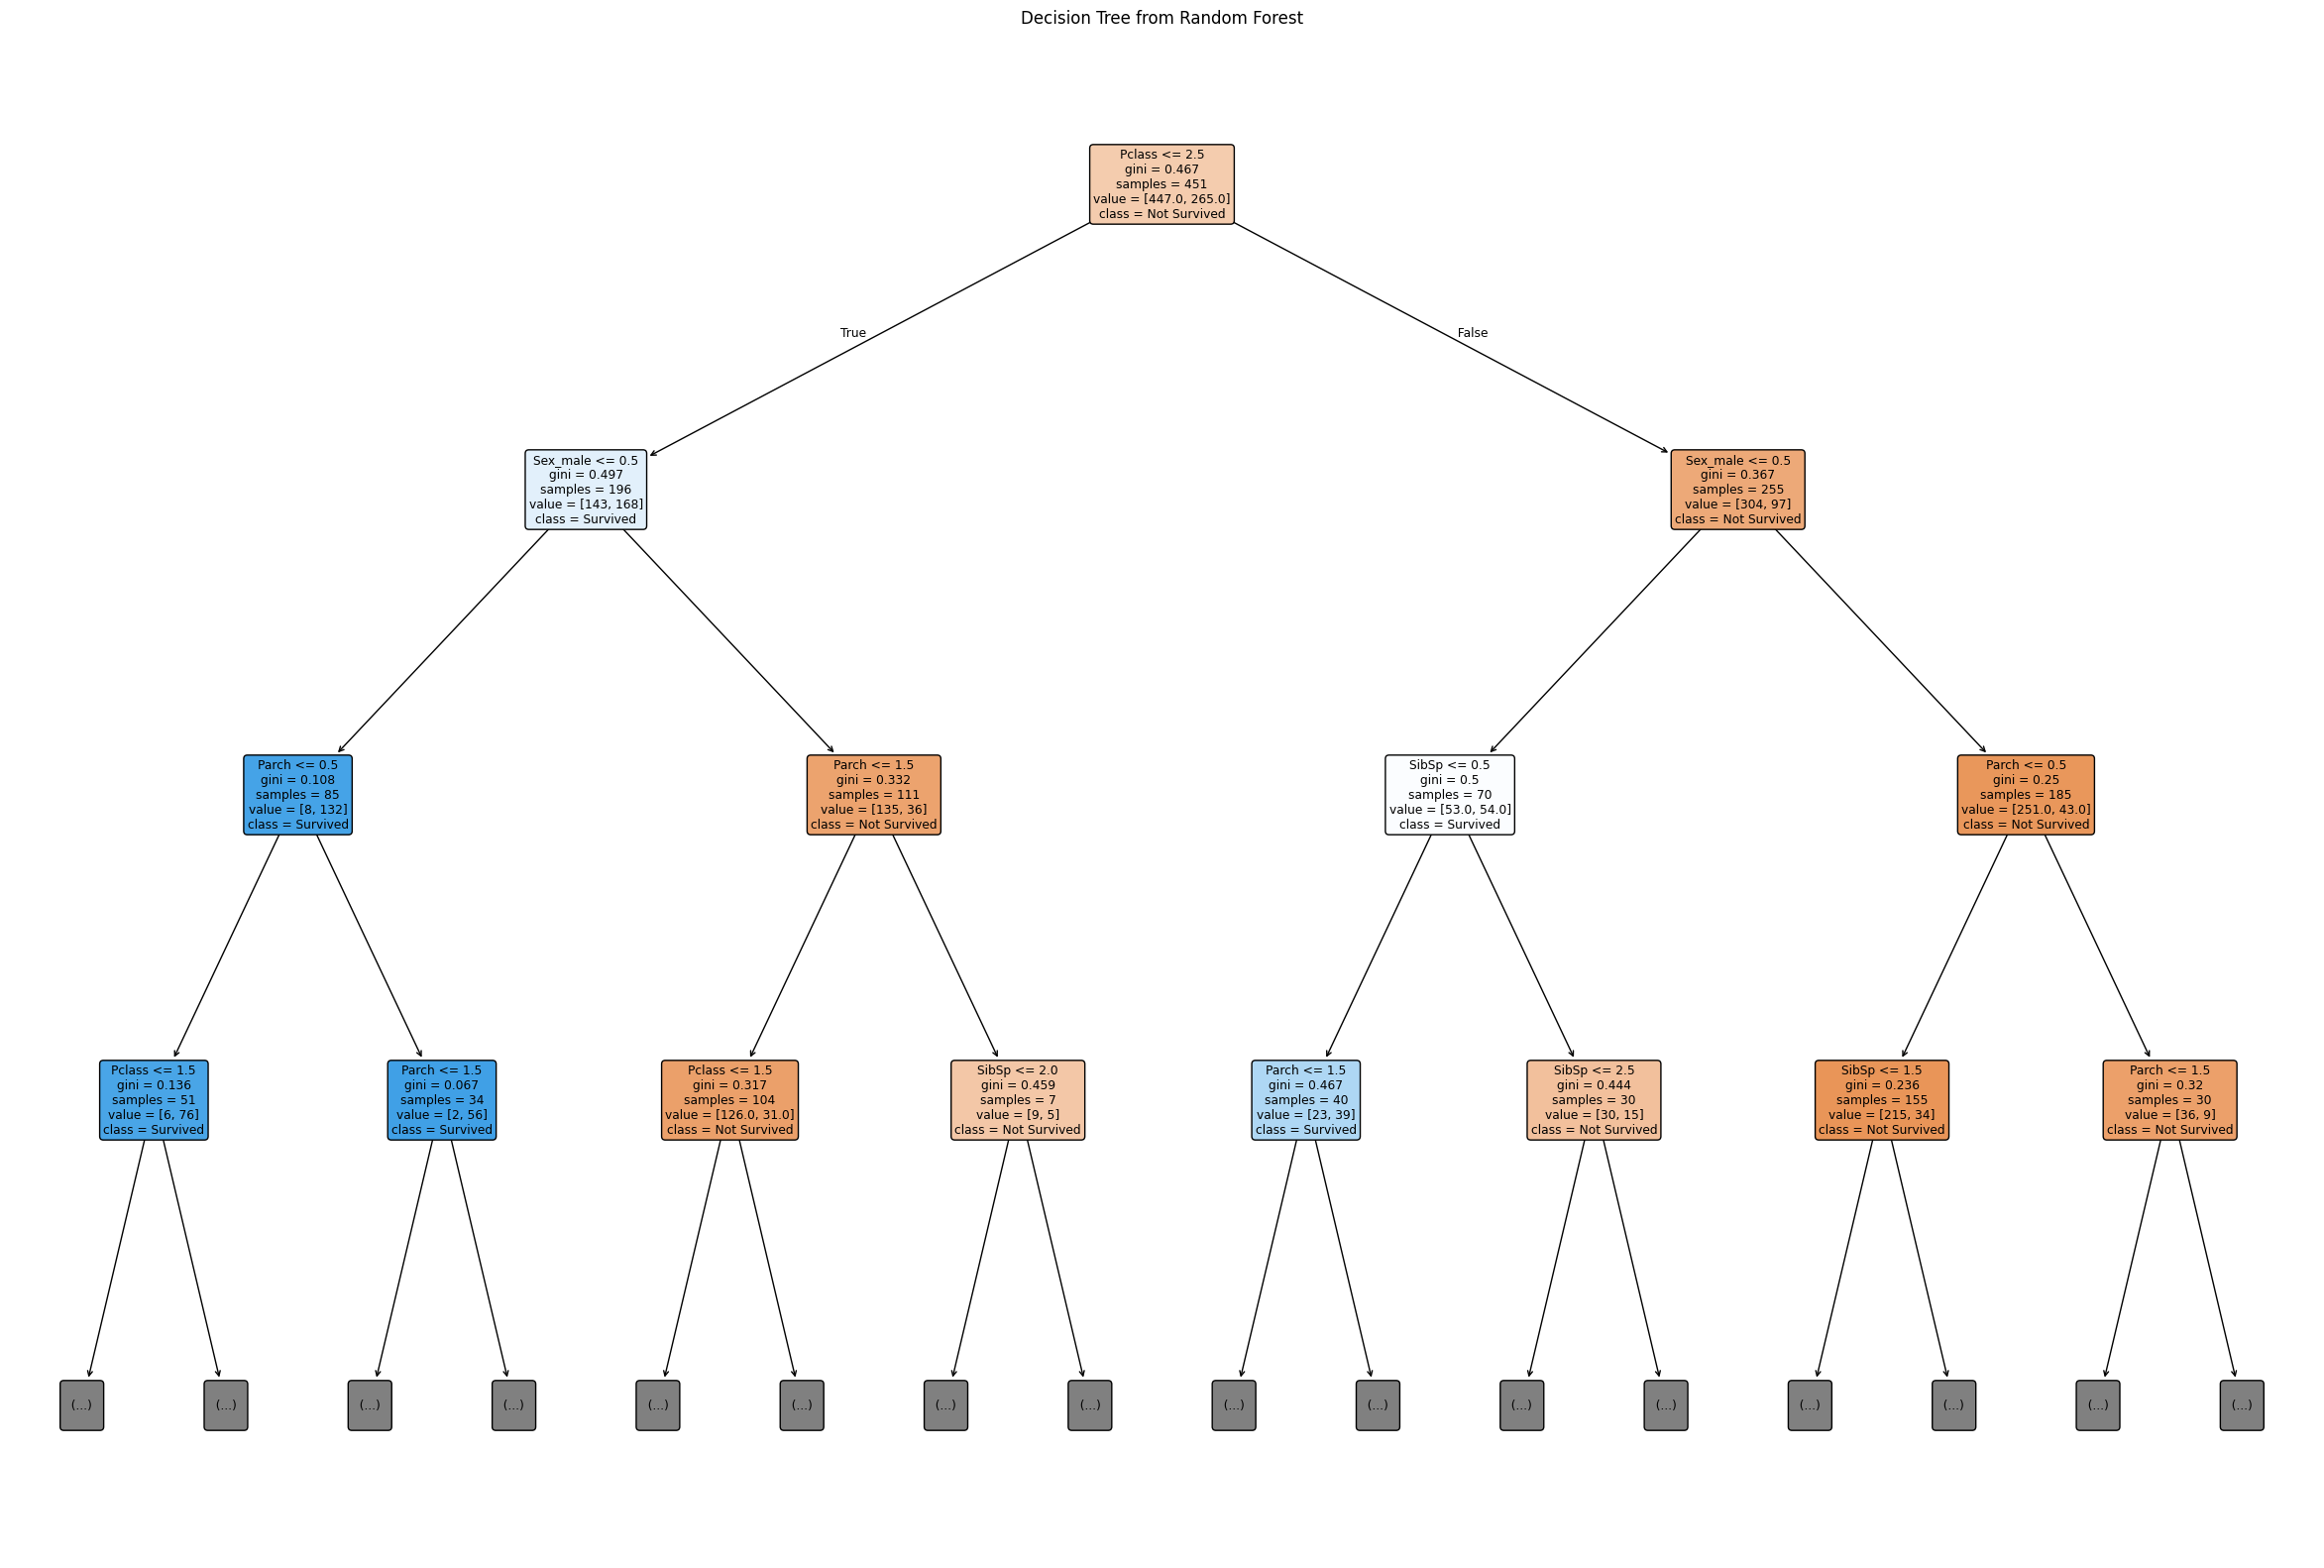

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Pick one tree from the random forest
estimator = model.estimators_[0]

plt.figure(figsize=(30, 20))
plot_tree(estimator,
          feature_names=X.columns,
          class_names=["Not Survived", "Survived"],
          filled=True,
          rounded=True,
          max_depth=3)  # limit tree depth for readability
plt.title("Decision Tree from Random Forest")
plt.show()


In [ ]:
from google.colab import files
files.download("submission.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
model.fit(X, y)

RandomForestClassifier(max_depth=5, random_state=42)

In [ ]:
X_test = pd.get_dummies(test_data[["Pclass", "Sex", "SibSp", "Parch"]])

# Align test data with training data
X, X_test = X.align(X_test, join='left', axis=1, fill_value=0)

# Predict on test data
predictions = model.predict(X_test)


In [ ]:
submission = pd.DataFrame({
    "PassengerId": test_data["PassengerId"],
    "Survived": predictions
})

submission.to_csv("submission.csv", index=False)

In [ ]:
from google.colab import files
files.download("submission.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
test_data = pd.read_csv('/content/test (1).csv')
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
